In [55]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('..')

from helper import linear_regression as lr
from helper import general

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
# load in raw data, not intercept term
X, y, Xval, yval, Xtest, ytest = lr.load_data()

# create polynomial features

In [57]:
lr.poly_features(X, power=3)

,f1,f2,f3
0,-15.936758,253.980260,-4047.621971
1,-29.152979,849.896197,-24777.006175
2,36.189549,1309.683430,47396.852168
3,37.492187,1405.664111,52701.422173
4,-48.058829,2309.651088,-110999.127750
5,-8.941458,79.949670,-714.866612
6,15.307793,234.328523,3587.052500
7,-34.706266,1204.524887,-41804.560890
8,1.389154,1.929750,2.680720
9,-44.383760,1969.918139,-87432.373590


# prepare polynomial regression data
1. expand feature with power = 8, or any power you want to use 
2. Apply **normalization** to combat $x^n$ situation
3. don't forget intercept term

In [62]:
X_poly, Xval_poly = lr.prepare_poly_data(X, Xval, power=8)
X_poly[:3, :]

array([[  1.00000000e+00,  -3.62140776e-01,  -7.55086688e-01,
          1.82225876e-01,  -7.06189908e-01,   3.06617917e-01,
         -5.90877673e-01,   3.44515797e-01,  -5.08481165e-01],
       [  1.00000000e+00,  -8.03204845e-01,   1.25825266e-03,
         -2.47936991e-01,  -3.27023420e-01,   9.33963187e-02,
         -4.35817606e-01,   2.55416116e-01,  -4.48912493e-01],
       [  1.00000000e+00,   1.37746700e+00,   5.84826715e-01,
          1.24976856e+00,   2.45311974e-01,   9.78359696e-01,
         -1.21556976e-02,   7.56568484e-01,  -1.70352114e-01]])

# plot learning curve
> again, first we don't apply regularization $\lambda=0$

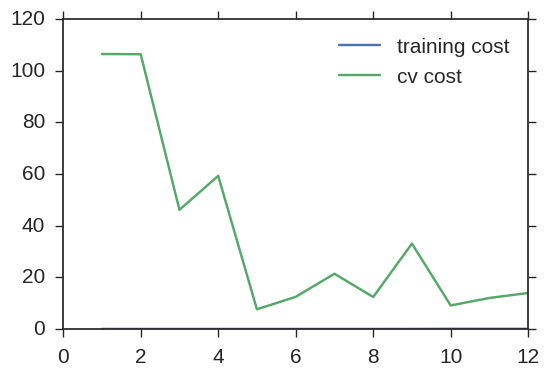

In [60]:
lr.plot_learning_curve(X_poly, y, Xval_poly, yval, l=0)

as you can see the training cost is too low to be true. This is **over fitting**